

## <center> Polytechnique Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8008 – Prétraitement de données <br> . <br> TP2  - Transformation, distribution et statistiques descriptives<br>  Hiver 2025 <br> . <br>  Janvier 2025 </center>

## Introduction

Le TD2 porte sur la transformation, la distribution et les statistiques descriptives. **Nous survolons l'utilisation de fonctions de base de Pandas et de l'analyse de données numériques.** Les données du fichier *Alzheimer_s_Disease_and_Healthy_Aging_Data.csv* sont des données publiques provenant d'enquêtes sur le vieillissement et la santé, faites par le [Département de la Santé et des Services sociaux des États-Unis](https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data). Contrairement aux données du TP1 qui avaient été traitées au préalable, celles utilisées pour ce TP ne le sont pas. Vous devrez traiter les données brutes pour obtenir une version plus condensée, facilitant l'analyse des tendances et des sous-groupes de population.

Les champs principaux du fichier de données **Alzheimer_s_Disease_and_Healthy_Aging_Data.csv** sont les suivants :

- **YearStart/YearEnd** : années de début et de fin des données
- **LocationAbbr** : abréviation du lieu
- **Class** : catégorie des données (ex. : Santé mentale)
- **Topic** : sujet spécifique (ex. : détresse mentale fréquente)
- **Question** : question étudiée
- **Data_Value_Unit** : unité de mesure des données (ex. : pourcentage)
- **Data_Value** : valeur des données collectées
- **StratificationCategory1 / Stratification1** : catégorie et détail de la première stratification (ex. : âge, genre)
- **StratificationCategory2 / Stratification2** : catégorie et détail de la deuxième stratification (ex. : race, ethnie)

Ces données servent de base pour explorer les tendances, identifier des corrélations, et mieux comprendre les facteurs liés aux maladies neurodégénératives et à la santé mentale des populations vieillissantes. Votre objectif dans ce TP sera de préparer ces données pour qu'elles soient prêtes pour une analyse approfondie.

Voici les librairies python qui sera à utiliser pour ce TP :
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html)
- [numpy](https://numpy.org/doc/stable/user/basics.html)
- [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html)

**À noter qu'au niveau de chaque question, il est recommandé de copier le DataFrame obtenu à la question précédente dans un nouveau DataFrame.**

*Veuillez vous référer à l'énoncé PDF de ce TP pour voir la sortie attendue.*


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
df

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS



### A)
Vous remarquerez que ce jeu de données est assez large, avec 284142 lignes et 31 colonnes.

Avec des ensembles de données de cette taille, on peut souvent trouver des défauts, comme des doublons de lignes.
Vérifiez donc s'il existe des valeurs en double dans le DataFrame. <b>(2 points)</b>

In [3]:
# Vérifions d'abord le nombre total de lignes
total_rows = len(df)

# Comptons maintenant les doublons
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

# Affichons les résultats
print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de doublons : {num_duplicates}")
print(f"Pourcentage de doublons : {(num_duplicates/total_rows * 100):.2f}%")

# Affichons quelques exemples de doublons s'il y en a
if num_duplicates > 0:
    print("\nExemples de lignes dupliquées :")
    print(df[duplicates])

Nombre total de lignes : 284142
Nombre de doublons : 0
Pourcentage de doublons : 0.00%


### B)
Il est possible d'extraire la durée du sondage en soustrayant l'année de début de l'année de fin. Utilisez lambda, ainsi que cette soustraction, pour garder les lignes avec une durée de sondage de moins d'1 an. <b>(3 points)</b>

In [4]:
# Créons une copie du DataFrame original
df_filtered = df.copy()

# Appliquons le filtre pour garder les lignes où la durée est < 1 an
df_filtered = df_filtered[df_filtered.apply(lambda x: x['YearEnd'] - x['YearStart'] < 1, axis=1)]

# Affichons le nombre de lignes avant et après le filtrage
print(f"Nombre de lignes avant filtrage : {len(df)}")
print(f"Nombre de lignes après filtrage : {len(df_filtered)}")

Nombre de lignes avant filtrage : 284142
Nombre de lignes après filtrage : 274881


### C)
Maintenant que cette étape est faite, les colonnes YearStart et YearEnd contiennent la même information. Renommez une des deux colonnes à `Year`, et supprimez l'autre. <b>(2 points)</b>

In [5]:
# Créons une copie du DataFrame précédent
df_renamed = df_filtered.copy()

# Renommons YearStart en Year
df_renamed = df_renamed.rename(columns={'YearStart': 'Year'})

# Supprimons YearEnd qui est redondante
df_renamed = df_renamed.drop('YearEnd', axis=1)

### D)
Certaines colonnes contiennent des données redondantes ou inutiles pour notre analyse. Éliminez toutes les colonnes inutiles en ne conservant que celles mentionnées dans l'introduction. Combien de colonnes reste-t-il ? <b>(2 points)</b>

In [6]:
# Créons une copie du DataFrame précédent
df_cleaned = df_renamed.copy()

# Liste des colonnes à conserver selon l'introduction
colonnes_a_garder = [
    'Year',  # renommée de YearStart
    'LocationAbbr',
    'Class',
    'Topic',
    'Question',
    'Data_Value_Unit',
    'Data_Value',
    'StratificationCategory1',
    'Stratification1',
    'StratificationCategory2',
    'Stratification2'
]

# Gardons uniquement ces colonnes
df_cleaned = df_cleaned[colonnes_a_garder]

# Affichons le nombre de colonnes, initiales et restantes
print(f"Nombre de colonnes initiales : {len(df_renamed.columns)}")
print(f"Nombre de colonnes restantes : {len(df_cleaned.columns)}")

Nombre de colonnes initiales : 30
Nombre de colonnes restantes : 11


### E)

Comme vu dans le module 1, le prétraitement des données consiste à gérer les défauts des données collectées, comme les valeurs nulles. La colonne `Data_Value` est importante pour notre analyse.

Vérifiez donc s'il existe des données manquantes dans la colonne `Data_Value`. Quel est le pourcentage de valeurs manquantes ? <b>(3 points)</b>

In [7]:
# Créons une copie du DataFrame précédent
df_missing = df_cleaned.copy()

# Calculons le nombre total de lignes
total_rows = len(df_missing)

# Calculons le nombre de valeurs manquantes dans Data_Value
missing_values = df_missing['Data_Value'].isna().sum()

# Calculons le pourcentage de valeurs manquantes
missing_percentage = (missing_values / total_rows) * 100

# Affichons les résultats
print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de valeurs manquantes dans Data_Value : {missing_values}")
print(f"Pourcentage de valeurs manquantes : {missing_percentage:.2f}%")

Nombre total de lignes : 274881
Nombre de valeurs manquantes dans Data_Value : 88286
Pourcentage de valeurs manquantes : 32.12%



### F)
Deux façons de traiter les données manquantes: les remplacer par la valeur médiane ou les éliminer complètement.

Il n’existe pas de solution **unique ou meilleure**. Tout dépend de l’analyse effectuée. Il est essentiel d’examiner les effets de chacun de ces choix sur l’analyse ultérieure. C’est pourquoi, dans ce TP, nous essayerons les deux méthodes.

Vous devez donc:

1. Créez deux copies de l'ensemble de données.
2. Supprimez les valeurs manquantes d'une des copies.
3. Remplacez les valeurs manquantes d'une autre copie par la médiane.

Affichez les nouveaux dataframes. Vous devriez avoir autour de 186595 lignes pour l'un et 274881 lignes pour l'autre. <b>(4 points)</b>

In [8]:
# Créons deux copies du DataFrame
df_drop = df_missing.copy()
df_median = df_missing.copy()

# Supprimons les valeurs manquantes dans la première copie
df_drop = df_drop.dropna(subset=['Data_Value'])

# Remplaçons les valeurs manquantes par la médiane dans la seconde copie
median_value = df_median['Data_Value'].median()
df_median = df_median.fillna({'Data_Value': median_value})

# Affichons les résultats
print("DataFrame avec suppression des valeurs manquantes :")
print(f"Nombre de lignes : {len(df_drop)}")

print("\nDataFrame avec remplacement par la médiane (", median_value, ") :")
print(f"Nombre de lignes : {len(df_median)}")

# Vérifions qu'il n'y a plus de valeurs manquantes
print("\nVérification des valeurs manquantes restantes :")
print("Dans df_drop :", df_drop['Data_Value'].isna().sum())
print("Dans df_median :", df_median['Data_Value'].isna().sum())

DataFrame avec suppression des valeurs manquantes :
Nombre de lignes : 186595

DataFrame avec remplacement par la médiane ( 33.0 ) :
Nombre de lignes : 274881

Vérification des valeurs manquantes restantes :
Dans df_drop : 0
Dans df_median : 0


**Note :** Pour la suite du travail, chaque étape devra être réalisée sur les deux copies de l'ensemble de données.

### G)

Plusieurs classes existent. On va évaluer la santé mentale "Mental Health".
Filtrez les données de la colonne "class" pour la valeur "Mental Health", puis déterminez la moyenne de `Data_Value` par `Year` et `Topic`. <b>(2 points)</b>

In [9]:
# Pour le DataFrame avec suppression des valeurs manquantes
df_drop_mental = df_drop[df_drop['Class'] == 'Mental Health']
mental_health_means_drop = df_drop_mental.groupby(['Year', 'Topic'])['Data_Value'].mean()

# Pour le DataFrame avec remplacement par la médiane
df_median_mental = df_median[df_median['Class'] == 'Mental Health']
mental_health_means_median = df_median_mental.groupby(['Year', 'Topic'])['Data_Value'].mean()

# Affichons les résultats
print("Moyennes pour les données avec suppression des valeurs manquantes :")
print(mental_health_means_drop)
print("\nMoyennes pour les données avec remplacement par la médiane :")
print(mental_health_means_median)

# Affichons aussi le nombre de lignes dans chaque cas
print(f"\nNombre de lignes (données avec suppression) : {len(df_drop_mental)}")
print(f"Nombre de lignes (données avec médiane) : {len(df_median_mental)}")

Moyennes pour les données avec suppression des valeurs manquantes :
Year  Topic                           
2015  Frequent mental distress            10.370795
      Lifetime diagnosis of depression    18.838661
2016  Frequent mental distress            10.678795
      Lifetime diagnosis of depression    17.439112
2017  Frequent mental distress            10.960913
      Lifetime diagnosis of depression    19.199265
2018  Frequent mental distress            10.930743
      Lifetime diagnosis of depression    17.982196
2019  Frequent mental distress            10.901620
      Lifetime diagnosis of depression    17.487637
2020  Frequent mental distress            10.770949
      Lifetime diagnosis of depression    17.193873
2021  Frequent mental distress            11.314676
      Lifetime diagnosis of depression    17.323026
2022  Frequent mental distress            11.792802
      Lifetime diagnosis of depression    17.957388
Name: Data_Value, dtype: float64

Moyennes pour les données a

### H)
Il est temps de comparer la suppression des données manquantes vs leur remplacement par la médiane. Pour cela, affichez les valeurs moyennes de `Data_Value` par année, pour chaque groupe et chaque topic. <b>(3 points)</b>

Moyennes des données (suppression des valeurs manquantes) :
Year  Class                    Topic                                                                   
2015  Caregiving               Duration of caregiving among older adults                                   71.807449
                               Expect to provide care for someone in the next two years                    18.322511
                               Intensity of caregiving among older adults                                  30.750682
                               Provide care for a friend or family member in past month                    22.575906
                               Provide care for someone with cognitive impairment within the past month    11.159585
                                                                                                             ...    
2022  Screenings and Vaccines  Pap test within past 3 years                                                41.474790
                 

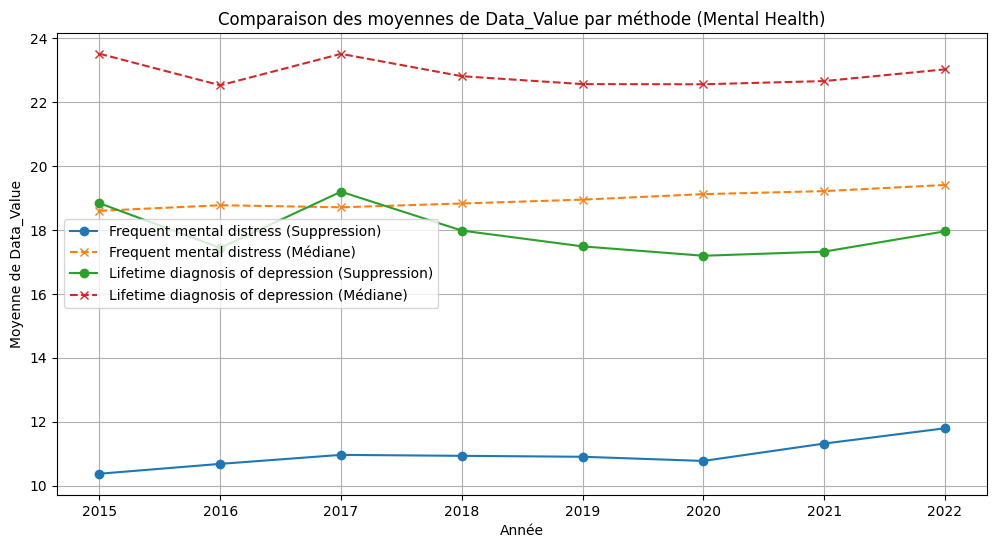

In [10]:
# Calcul des moyennes pour les données avec suppression des valeurs manquantes
group_means_drop = df_drop.groupby(['Year', 'Class', 'Topic'])['Data_Value'].mean()

# Calcul des moyennes pour les données avec remplacement par la médiane
group_means_median = df_median.groupby(['Year', 'Class', 'Topic'])['Data_Value'].mean()

# Comparaison des résultats
print("Moyennes des données (suppression des valeurs manquantes) :")
print(group_means_drop)
print("\nMoyennes des données (remplacement par la médiane) :")
print(group_means_median)

# Affichage des tendances (visualisation)
import matplotlib.pyplot as plt

comparison = pd.DataFrame({
    'Suppression': group_means_drop,
    'Remplacement_médiane': group_means_median
}).reset_index()

# Extraction des données pour "Mental Health" uniquement, par exemple
comparison_mental = comparison[comparison['Class'] == 'Mental Health']

# Graphique pour chaque topic
topics = comparison_mental['Topic'].unique()
plt.figure(figsize=(12, 6))

for topic in topics:
    topic_data = comparison_mental[comparison_mental['Topic'] == topic]
    plt.plot(topic_data['Year'], topic_data['Suppression'], label=f'{topic} (Suppression)', marker='o')
    plt.plot(topic_data['Year'], topic_data['Remplacement_médiane'], label=f'{topic} (Médiane)', linestyle='--', marker='x')

plt.title("Comparaison des moyennes de Data_Value par méthode (Mental Health)")
plt.xlabel("Année")
plt.ylabel("Moyenne de Data_Value")
plt.legend()
plt.grid()
plt.show()


## 3. LIVRABLES
Vous devez remettre sur Moodle un fichier compressé .zip contenant :

1) Le code : Un Jupyter notebook en Python qui contient le code tel implanté avec les librairies minimales demandées pour ce TP (Python, Pandas, Matplotlib). Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière. Tous vos résultats doivent être reproductibles avec le code dans le notebook. *Attention, en aucun cas votre code ne doit avoir été copié de d'ailleurs.*

2) Un fichier pdf représentant votre notebook complètement exécuté sous format pdf (obtenu via latex ou imprimé en pdf avec le navigateur). Assurez-vous que le PDF est entièrement lisible. [Tutoriel youtube](https://www.youtube.com/watch?v=-Ti9Mm21uVc)

ATTENTION: assurez-vous que votre fichier compressé .zip ne dépasse pas la taille limite acceptée sur Moodle.


__ÉVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__
1. Implantation correcte et efficace
2. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.) <b>(1 point)</b>
3. Réponses correctes/sensées aux questions de réflexion ou d'analyse

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre. Dans le cas contraire, cela sera considéré comme du plagiat.
- __Règle 2__: Vous êtes libres de discuter avec d'autres équipes. Cependant, vous ne pouvez en aucun cas incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.

### Conversion en PDF sur Google Colab

In [11]:
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Assurez vous d'avoir téléchargé le TP complété en notebook sur votre ordinateur, puis importé ce fichier dans le répertoire "content" avant de rouler la ligne suivante.

In [ ]:
!jupyter nbconvert --to pdf /content/TP1.ipynb